In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
df= pd.read_csv('wine-reviews.csv',usecols=['country','description','designation','points','price','province','variety','winery'])

In [5]:
df.head()

,country,description,designation,points,price,province,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Pinot Noir,Sweet Cheeks


In [6]:
df = df.dropna(subset=['description','points'])

In [7]:
df.head()

,country,description,designation,points,price,province,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Pinot Noir,Sweet Cheeks


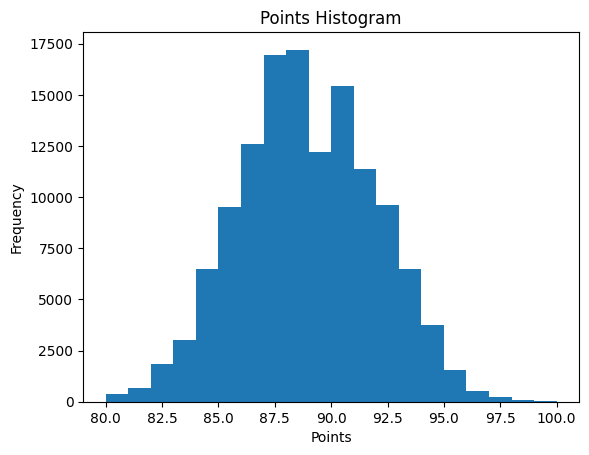

In [9]:
plt.hist(df['points'],bins=20)
plt.title('Points Histogram')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

In [10]:
df=pd.read_csv('diabetes.csv')

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
df[df['Outcome']==1] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [24]:
df[df['Outcome']==1].shape[0],df[df['Outcome']==0].shape[0]

(268, 500)

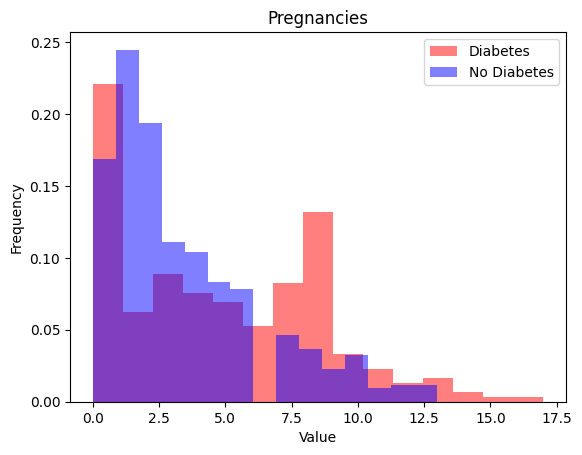

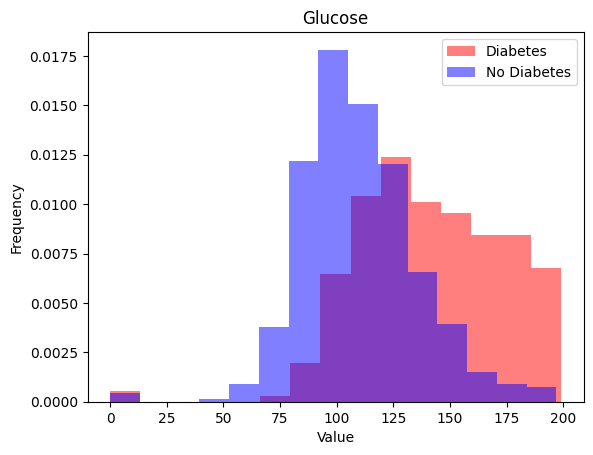

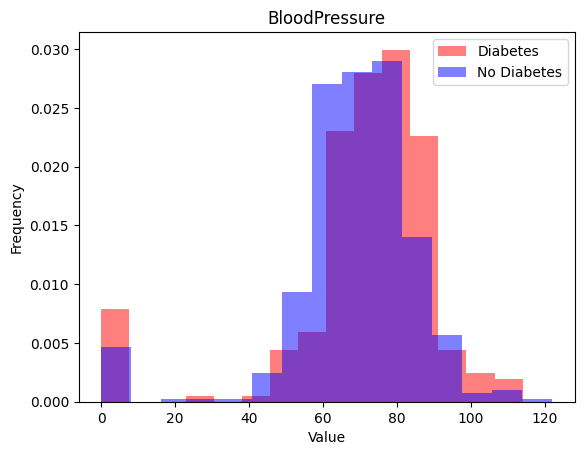

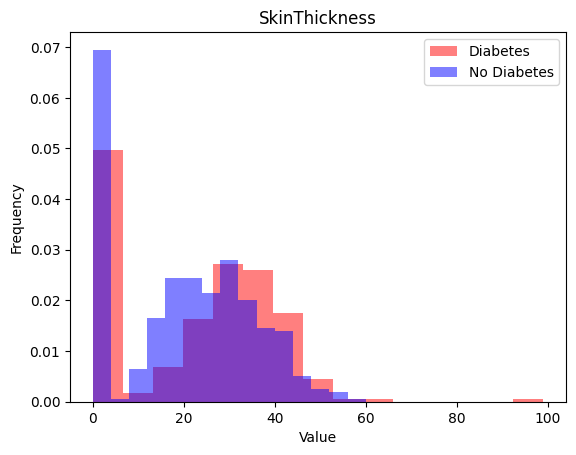

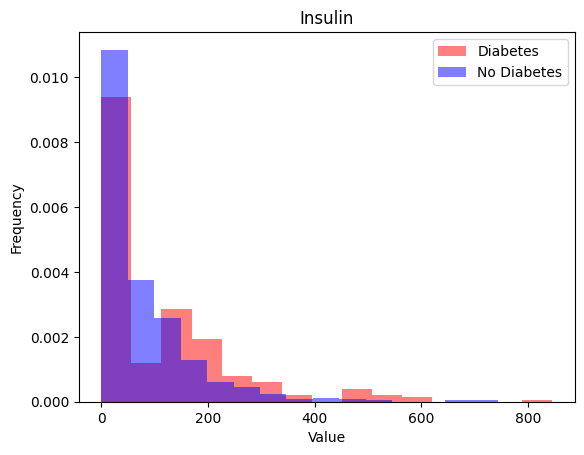

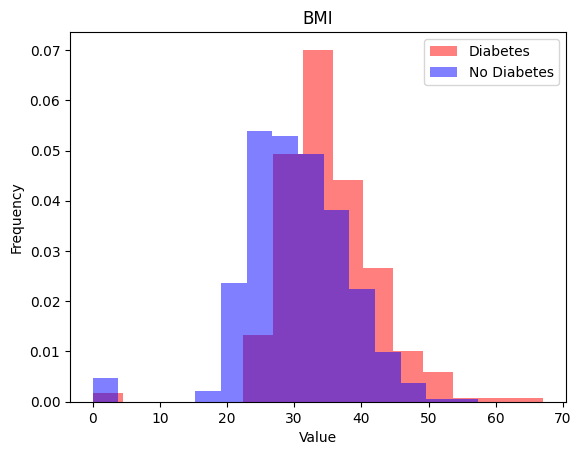

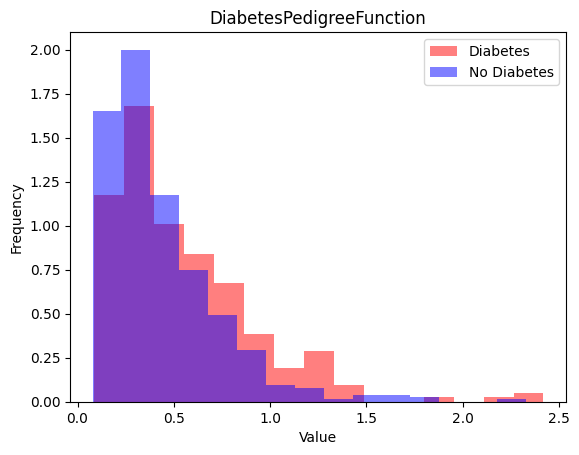

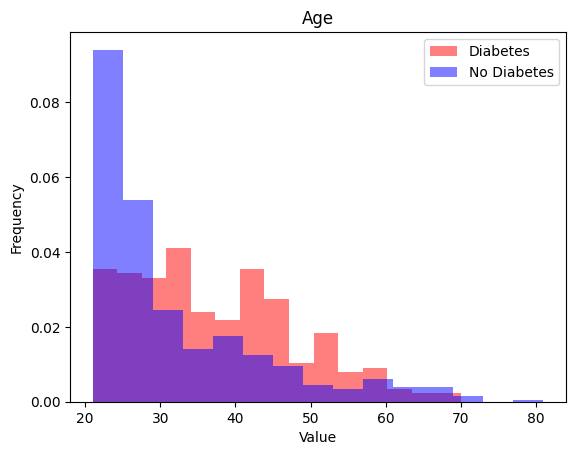

In [25]:
for i in range (len(df.columns[:-1])):
    label=df.columns[i]
    plt.hist(df[df['Outcome']==1][label],color='r',alpha=0.5,label='Diabetes',density=True,bins=15)
    plt.hist(df[df['Outcome']==0][label],color='b',alpha=0.5,label='No Diabetes',density=True,bins=15)
    plt.title(label)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()



In [26]:
x=df[df.columns[:-1]].values    

In [27]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [28]:
y=df['Outcome'].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [29]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 4.6 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 4.5 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 4.3 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.1 MB 4.2 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 4.1 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 4.1 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.1 MB 4.1 MB/s eta 0:00:02
   --------------------------- ------------ 7.6/11.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 4.0 MB/s eta 0:00:01
   -------------------------------- ------- 9.2/11.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 4.0 MB/s eta 0:00:01
   ---

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_temp,Y_train,Y_temp=train_test_split(x,y,test_size=0.4,random_state=0)
X_valid,X_test,Y_valid,Y_test=train_test_split(X_temp,Y_temp,test_size=0.5,random_state=0)

In [32]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [36]:
model.evaluate(X_train,Y_train)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6306 - loss: 21.3528  


[20.023902893066406, 0.6413043737411499]

In [37]:
model.evaluate(X_valid,Y_valid)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6835 - loss: 14.6872


[16.16263198852539, 0.649350643157959]

In [38]:
model.fit(X_train,Y_train,epochs=100,batch_size=16,validation_data=(X_valid,Y_valid))

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6676 - loss: 13.2688 - val_accuracy: 0.4351 - val_loss: 3.9930
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4591 - loss: 3.2953 - val_accuracy: 0.6234 - val_loss: 1.5593
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6580 - loss: 1.2717 - val_accuracy: 0.6623 - val_loss: 1.1411
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6267 - loss: 1.2963 - val_accuracy: 0.5974 - val_loss: 0.8408
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6623 - loss: 0.7164 - val_accuracy: 0.5649 - val_loss: 0.7482
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6474 - loss: 0.7795 - val_accuracy: 0.6558 - val_loss: 0.7523
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6592 - loss: 0.7111 - val_accuracy: 0.6688 - val_loss: 0.6966
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5855 - loss: 0.7194 - val_accuracy: 0.6429 - 

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
x=df[df.columns[:-1]].values
y=df['Outcome'].values
x,y

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [43]:
scale=StandardScaler()
x=scale.fit_transform(x)
data=np.hstack((x,y.reshape(-1,1)))
transformed_df=pd.DataFrame(data,columns=df.columns)


In [42]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

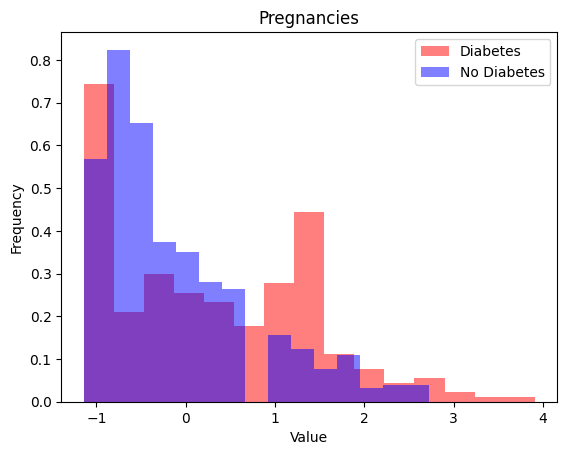

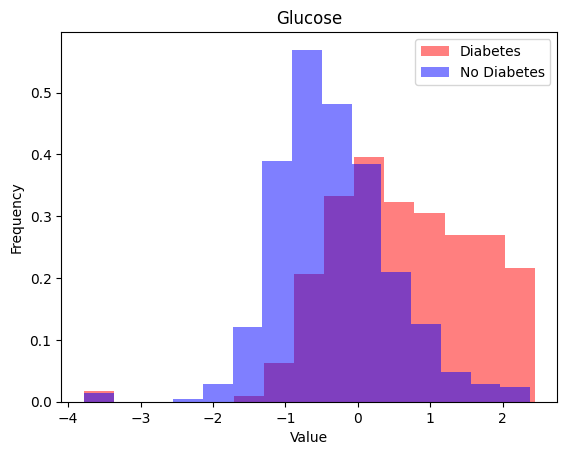

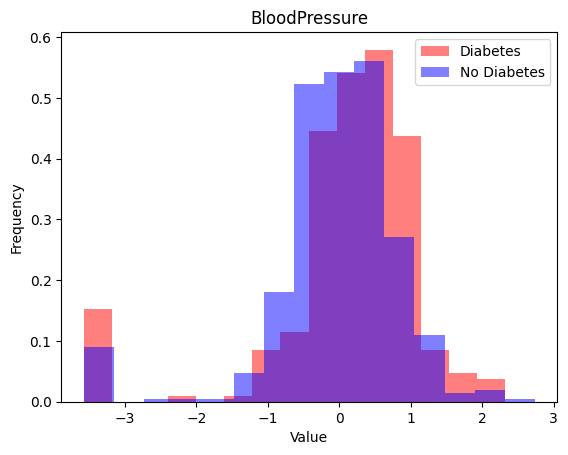

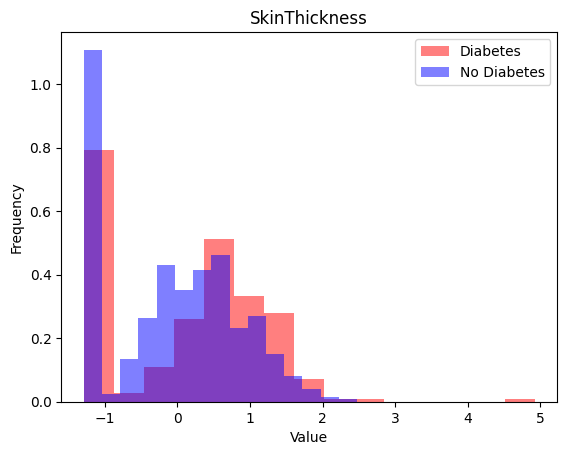

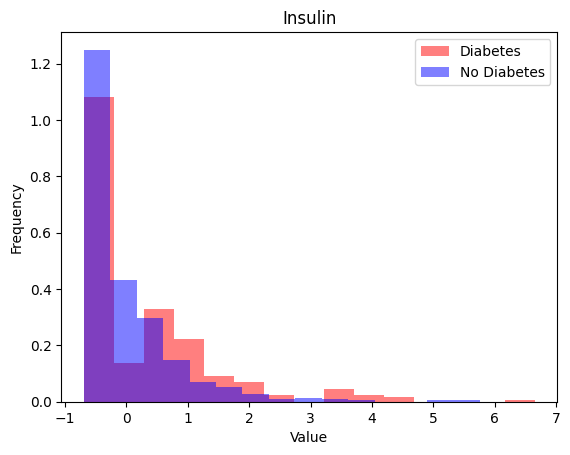

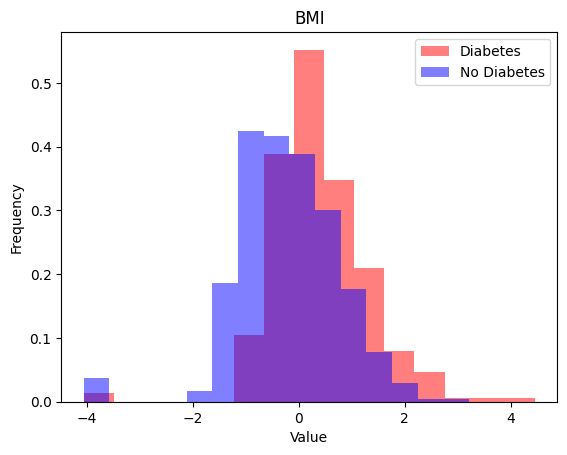

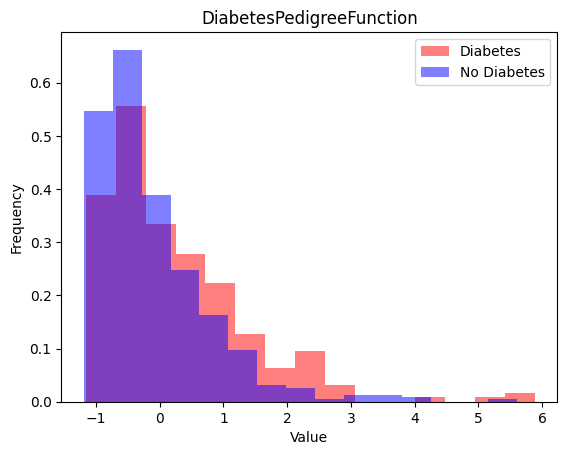

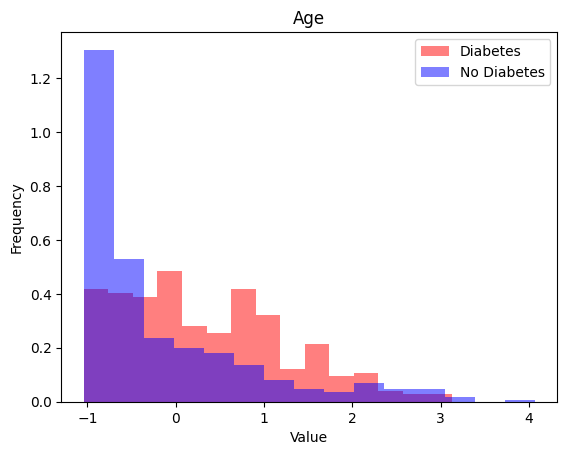

In [44]:
for i in range(len(df.columns[:-1])):
    label=df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome']==1][label],color='r',alpha=0.5,label='Diabetes',density=True,bins=15)
    plt.hist(transformed_df[transformed_df['Outcome']==0][label],color='b',alpha=0.5,label='No Diabetes',density=True,bins=15)
    plt.title(label)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [45]:
!pip install imbalanced-learn


In [46]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
over =RandomOverSampler()
x,y=over.fit_resample(x,y)
data=np.hstack((x,y.reshape(-1,1)))
transformed_df=pd.DataFrame(data,columns=df.columns)


In [49]:
len(transformed_df[transformed_df['Outcome']==1]),len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [50]:
X_train,X_temp,Y_train,Y_temp=train_test_split(x,y,test_size=0.4,random_state=0)
X_valid,X_test,Y_valid,Y_test=train_test_split(X_temp,Y_temp,test_size=0.5,random_state=0)

In [51]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [54]:
model.evaluate(X_train,Y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5037 - loss: 0.7106  


[0.722926139831543, 0.4883333444595337]

In [55]:
model.evaluate(X_valid,Y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4595 - loss: 0.7490 


[0.7233244180679321, 0.49000000953674316]

In [56]:
model.fit(X_train,Y_train,epochs=100,batch_size=16,validation_data=(X_valid,Y_valid))

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5442 - loss: 0.6995 - val_accuracy: 0.6400 - val_loss: 0.6438
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6585 - loss: 0.6296 - val_accuracy: 0.7000 - val_loss: 0.5972
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6564 - loss: 0.6133 - val_accuracy: 0.7000 - val_loss: 0.5683
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7451 - loss: 0.5538 - val_accuracy: 0.7150 - val_loss: 0.5483
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7156 - loss: 0.5727 - val_accuracy: 0.7250 - val_loss: 0.5345
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7412 - loss: 0.5206 - val_accuracy: 0.7400 - val_loss: 0.5235
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7151 - loss: 0.5418 - val_accuracy: 0.7400 - val_loss: 0.5156
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7496 - loss: 0.4872 - val_accuracy: 0.7200 - v

In [57]:
model.evaluate(X_test,Y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8135 - loss: 0.4080 


[0.46382737159729004, 0.800000011920929]

In [58]:
print('Done')

Done
